# Opening data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df = pd.read_csv('./data/laptop_price.csv', sep=',')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

# Cleaning data

In [11]:
df.isnull().sum() # No null values

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

In [18]:
df.duplicated().sum() # No duplicate values

0

# Doing a correlation heatmap

In [19]:
ndf = df.select_dtypes(include=np.number)

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
0,13.3,2.3,8,1.37,1339.69
1,13.3,1.8,8,1.34,898.94
2,15.6,2.5,8,1.86,575.00
3,15.4,2.7,16,1.83,2537.45
4,13.3,3.1,8,1.37,1803.60
...,...,...,...,...,...
1270,14.0,2.5,4,1.80,638.00
1271,13.3,2.5,16,1.30,1499.00
1272,14.0,1.6,2,1.50,229.00
1273,15.6,2.5,6,2.19,764.00


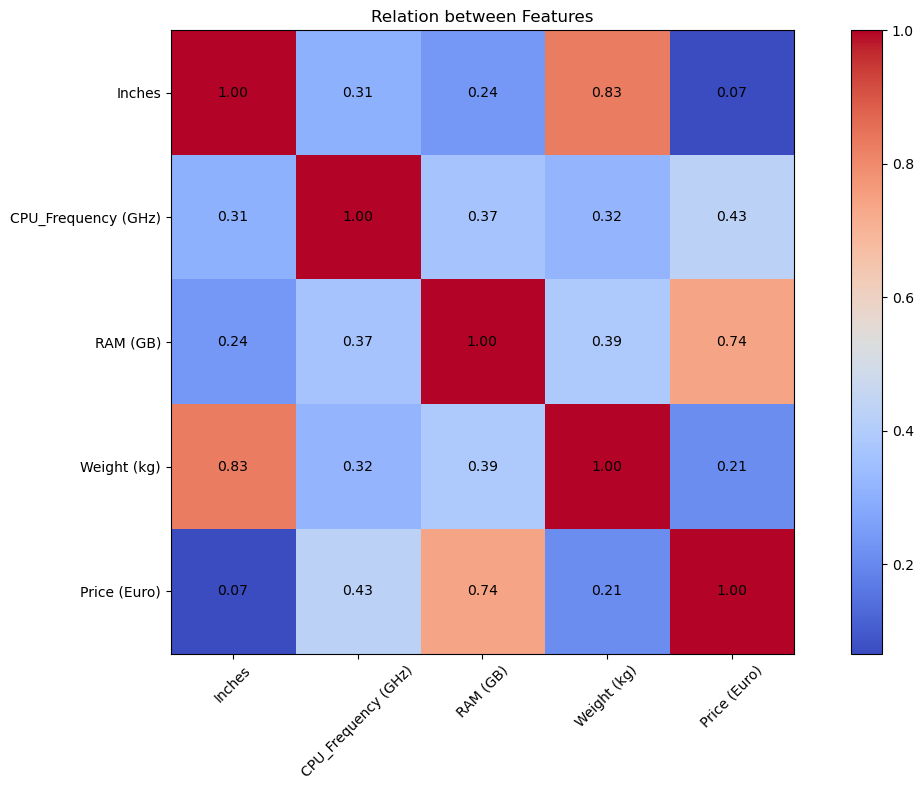

In [29]:
cndf = ndf.corr()

# HMAP using imshow
plt.figure(figsize=(12,8))
heatmap = plt.imshow(cndf, cmap='coolwarm', interpolation='none')
plt.colorbar(heatmap)

# Lables
plt.xticks(ticks=np.arange(len(cndf.columns)), labels=cndf.columns, rotation=45)
plt.yticks(ticks=np.arange(len(cndf.columns)), labels=cndf.columns)

# Correlation values on heatmap
for i in range(len(cndf.columns)):
    for j in range(len(cndf.columns)):
        plt.text(j, i, f'{cndf.iloc[i, j]:.2f}',
                 ha='center', va='center', color='black')

# Plot config
plt.title('Relation between Features')
plt.tight_layout()

# Saving plot
plt.savefig('laptop_components_correlation.png', dpi=300)

# Showing plot
plt.show()